## Geofile Visualizations

### Loading in shapefiles

In [49]:
import pandas as pd
import numpy as np

import os
cwd = os.getcwd()
cwd

'/Users/sophiamlawer/ML_project/CAPP-30254-Covid-Variants/notebooks'

In [50]:
import geopandas as gpd

def read_in(geo):
    shapefile = gpd.read_file(geo)
    return shapefile

il_geo = read_in("../Boundaries/IL_BNDY_County/IL_BNDY_County_Py.shp")
print("done")
mo_geo = read_in("../Boundaries/MO_2018_County_Boundaries-shp/MO_2018_County_Boundaries.shp")
print("done")
oh_geo = read_in("../Boundaries/ODOT_County_Boundaries/ODOT_County_Boundaries.shp")


done
done


### Clean IL

In [51]:
il_geo.columns = ["county", "fips", "geometry"]
il_geo["fips"] = il_geo["fips"].astype(str)
il_geo["fips"] = il_geo["fips"].str.pad(width=3, side='left', fillchar='0')
il_geo["fips"] = "17" + il_geo["fips"]
il_geo.drop("county", axis=1, inplace=True)
il_geo

,fips,geometry
0,17111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493..."
1,17007,"POLYGON ((-88.70742 42.49351, -88.70740 42.493..."
2,17141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200..."
3,17197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724..."
4,17099,"POLYGON ((-88.93885 41.62836, -88.93871 41.628..."
...,...,...
97,17081,"POLYGON ((-89.14445 38.47386, -89.12638 38.473..."
98,17101,"POLYGON ((-87.90805 38.85012, -87.88944 38.849..."
99,17121,"POLYGON ((-89.13843 38.73632, -89.13827 38.750..."
100,17181,"POLYGON ((-89.04143 37.59649, -89.04143 37.596..."


### Ohio

In [52]:
oh_geo_clean = oh_geo[["FIPS_COUNT", "geometry"]]
oh_geo_clean.columns = ["fips", "geometry"]
oh_geo_clean

,fips,geometry
0,39071,"POLYGON ((-83.78330 39.26382, -83.78312 39.263..."
1,39073,"POLYGON ((-82.49595 39.60265, -82.49505 39.612..."
2,39075,"POLYGON ((-81.87727 40.66713, -81.87564 40.667..."
3,39077,"POLYGON ((-82.83547 41.14407, -82.83549 41.145..."
4,39049,"POLYGON ((-83.24596 39.96574, -83.24595 39.965..."
...,...,...
83,39163,"POLYGON ((-82.51710 39.36942, -82.51595 39.379..."
84,39165,"POLYGON ((-83.98859 39.44441, -83.98941 39.435..."
85,39067,"POLYGON ((-81.27273 40.36923, -81.27271 40.369..."
86,39129,"POLYGON ((-82.84304 39.56150, -82.84164 39.561..."


### Missouri

In [53]:
mo_geo = mo_geo[["COUNTYFIPS", "geometry"]]
mo_geo.columns = ["fips", "geometry"]
mo_geo["fips"] = "29" + mo_geo["fips"]
mo_geo

,fips,geometry
0,29045,"POLYGON ((-91.72917 40.61371, -91.72120 40.603..."
1,29005,"POLYGON ((-95.20235 40.57847, -95.20239 40.566..."
2,29199,"POLYGON ((-91.94509 40.47537, -91.94526 40.460..."
3,29197,"POLYGON ((-92.35069 40.59327, -92.35076 40.578..."
4,29147,"POLYGON ((-94.60088 40.31487, -94.60131 40.300..."
...,...,...
110,29119,"POLYGON ((-94.07704 36.50209, -94.07703 36.498..."
111,29069,"POLYGON ((-89.95952 36.62857, -89.96002 36.628..."
112,29155,"POLYGON ((-89.67368 36.40043, -89.67240 36.400..."
113,29127,"POLYGON ((-91.73454 39.65748, -91.75336 39.657..."


In [54]:
df = il_geo.append(mo_geo).append(oh_geo_clean)
df

,fips,geometry
0,17111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493..."
1,17007,"POLYGON ((-88.70742 42.49351, -88.70740 42.493..."
2,17141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200..."
3,17197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724..."
4,17099,"POLYGON ((-88.93885 41.62836, -88.93871 41.628..."
...,...,...
83,39163,"POLYGON ((-82.51710 39.36942, -82.51595 39.379..."
84,39165,"POLYGON ((-83.98859 39.44441, -83.98941 39.435..."
85,39067,"POLYGON ((-81.27273 40.36923, -81.27271 40.369..."
86,39129,"POLYGON ((-82.84304 39.56150, -82.84164 39.561..."


In [55]:
df.to_csv('../Data/geofiles.csv', index = False)

### Link with Model Results

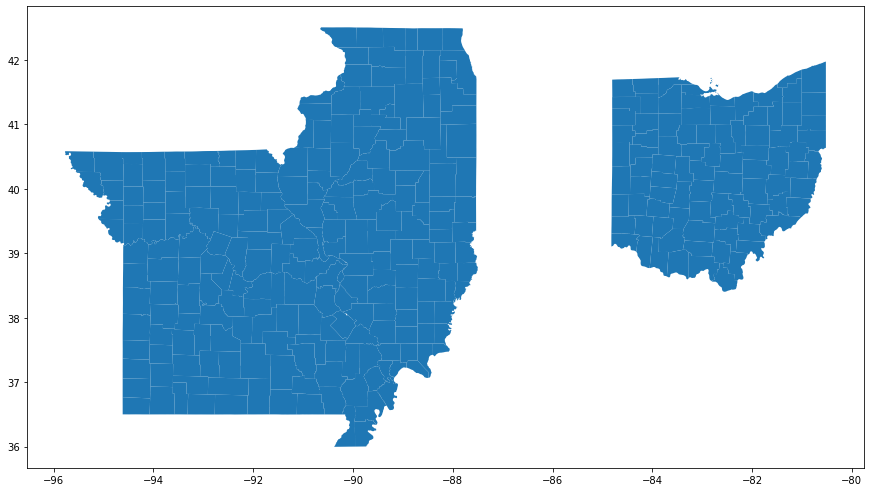

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
df.plot(ax=ax)

plt.show()